<a href="https://colab.research.google.com/github/ShahKhalid1234/Python/blob/main/flights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import math

In [10]:
math.comb(110, 101)* ((0.9)**101) * ((0.1)**9)

0.1110000148444777

In [11]:
math.comb(110, 102)* ((0.9)**102) * ((0.1)**8)

0.08814707061179114

In [12]:
!gdown 1oOdoudwBLvPFhhBgU6OrYqzWsiJi7_HR

Downloading...
From: https://drive.google.com/uc?id=1oOdoudwBLvPFhhBgU6OrYqzWsiJi7_HR
To: /content/Flight.csv
100% 12.2k/12.2k [00:00<00:00, 34.6MB/s]


In [13]:
import pandas as pd

In [14]:
flights = pd.read_csv("Flight.csv")

In [15]:
flights.shape

(1000, 3)

In [18]:
flights.head()

,Passenger_ID,Flight_ID,Arrived
0,1811,A320,1
1,1812,A320,1
2,1813,B777,1
3,1814,B737,1
4,1815,B737,1


In [19]:
# probability of passangers showing up.
flights['Arrived'].value_counts()

1    902
0     98
Name: Arrived, dtype: int64

In [20]:
showsup_probability = 902/1000
showsup_probability

0.902

In [21]:
PENALTY = 50000

def calculate_expected_penalty(ticket_sold):

    total_penality = 0.0

    for i in range(1, ticket_sold - 100+1):
        prob = math.comb(ticket_sold, 100+i) * (0.9)**(100+i) * (0.1)**(ticket_sold-100-i)
        penalty = prob*PENALTY*i
        total_penality += penalty

    return total_penality

In [27]:
from tabulate import tabulate

# Initialize empty list to store data
table_data = []

# Iterate through the range and calculate profit for each number of overbooked seats
for i in range(100, 120):
    revenue = 5000 * i
    penalty = calculate_expected_penalty(i)  # Assuming calculate_expected_penalty function is defined elsewhere
    profit = revenue - penalty
    table_data.append(["Overbook seats: " + str(i), "Profit Made: " + str(round(profit))])

# Print the table
print(tabulate(table_data, headers=["Overbooked Seats", "Profit Made"]))


Overbooked Seats     Profit Made
-------------------  -------------------
Overbook seats: 100  Profit Made: 500000
Overbook seats: 101  Profit Made: 504999
Overbook seats: 102  Profit Made: 509986
Overbook seats: 103  Profit Made: 514912
Overbook seats: 104  Profit Made: 519633
Overbook seats: 105  Profit Made: 523826
Overbook seats: 106  Profit Made: 526920
Overbook seats: 107  Profit Made: 528090
Overbook seats: 108  Profit Made: 526347
Overbook seats: 109  Profit Made: 520708
Overbook seats: 110  Profit Made: 510394
Overbook seats: 111  Profit Made: 494984
Overbook seats: 112  Profit Made: 474479
Overbook seats: 113  Profit Made: 449259
Overbook seats: 114  Profit Made: 419979
Overbook seats: 115  Profit Made: 387420
Overbook seats: 116  Profit Made: 352371
Overbook seats: 117  Profit Made: 315531
Overbook seats: 118  Profit Made: 277469
Overbook seats: 119  Profit Made: 238613


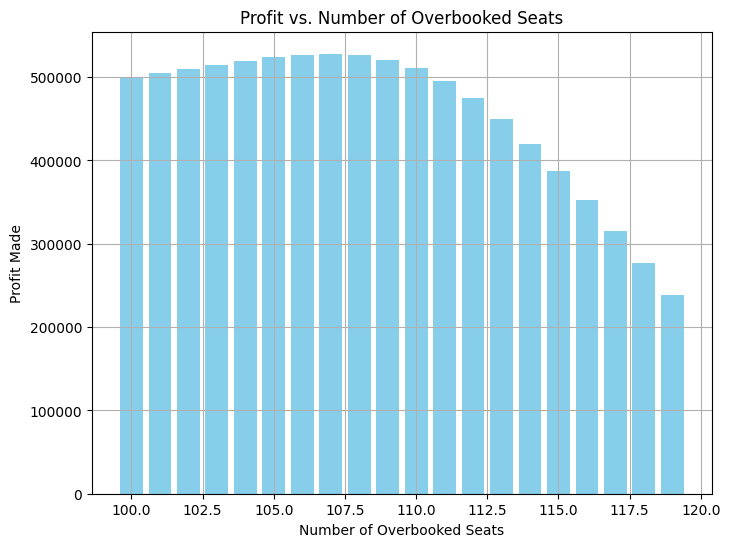

In [26]:

import matplotlib.pyplot as plt

# Initialize lists to store data
overbooked_seats = []
profits = []

# Iterate through the range and calculate profit for each number of overbooked seats
for i in range(100, 120):
    revenue = 5000 * i
    penalty = calculate_expected_penalty(i)  # Assuming calculate_expected_penalty function is defined elsewhere
    profit = revenue - penalty
    overbooked_seats.append(i)
    profits.append(profit)

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(overbooked_seats, profits, color='skyblue')
plt.xlabel('Number of Overbooked Seats')
plt.ylabel('Profit Made')
plt.title('Profit vs. Number of Overbooked Seats')
plt.grid(True)
plt.show()
